## Final Task:
This is your final evaluation for the project. As decided, we will be predicting images of people into three classes: `without_mask`, `mask_weared_incorrect` and `with_mask`. 

In [38]:
import tensorflow as tf

### Loading the dataset
Make a copy of the dataset given to you in your Google Drive (keep it outside, don't put it in any folder to avoid inconvenience). Ensure it is named as `Mask_Dataset` or change the path (the variable `data_dir`) accordingly.

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pathlib

path='/content/drive/MyDrive/Mask_Dataset/'
data_dir = pathlib.Path(path)

### Know the Dataset
Most of the code is written for you as you aren't used to these libraries. You are to go through the documentation for your benefit.

In [ ]:
# Print image count
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

8982


In [ ]:
# Print Output Labels
import os
output_classes = os.listdir(data_dir)
print(output_classes)

['without_mask', 'mask_weared_incorrect', 'with_mask']


[2994, 2994, 2994]


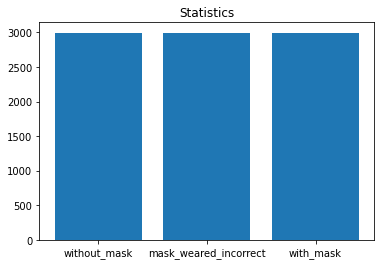

In [ ]:
# Plot count of each ouput label
import matplotlib.pyplot as plt

count=[]
for label in output_classes:
  this_path=path+label
  dir=pathlib.Path(this_path)
  im_count=os.listdir(dir)
  count.append(len(im_count))

print(count)

plt.bar(output_classes,count)
plt.title("Statistics")
plt.show()

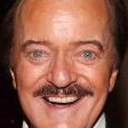

In [ ]:
# Check some sample images (Use of cv2)
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/drive/MyDrive/Mask_Dataset/without_mask/24.png')
cv2_imshow(img)

# Your code

In [ ]:
# Check shape of the images in your dataset. This will be helpful while specifying input_shape in your Transfer Learning Model
img.shape

(128, 128, 3)

In [ ]:
# Check if all the images have same shape, else you need to resize them to some common size
import cv2
from google.colab.patches import cv2_imshow
j = 0
for i in range (1,2994):
 img = cv2.imread('/content/drive/MyDrive/Mask_Dataset/without_mask/' + str(i) + '.png')
 if img.shape == (128, 128, 3):
    j = j + 1

print(j)    

2993


In [46]:
# Check if all the images have same shape, else you need to resize them to some common size
import cv2
from google.colab.patches import cv2_imshow
l = 0
for i in range (1,2994):
  img = cv2.imread('/content/drive/MyDrive/Mask_Dataset/mask_weared_incorrect/' + str(i) + '.png')
  if img.shape == (128, 128, 3):
    l = l + 1

print(l)    

2993


In [49]:
 #Check if all the images have same shape, else you need to resize them to some common size
#import cv2
#from google.colab.patches import cv2_imshow
#m = 0
#for i in range (1,2994):
#   img = cv2.imread('/content/drive/MyDrive/Mask_Dataset/with_mask/' + {i} + '.png')
#  if img.shape == (128, 128, 3):
#        m = m + 1
#print(m)    

TypeError: ignored

In [51]:
#If the shape is variable, reshape to a common size 
#If it is same, prove it
if j == l:
  print("yes")
else :
  print("No")

NameError: ignored

In [ ]:
# Anything else you want to plot/experiment

### Model Definition
Choose a model for Transfer Learning (You may also experment with multiple models and keep all of them in this notebook)

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import MobileNet
from tensorflow.keras import datasets, layers, models

In [ ]:
base_model=MobileNet(include_top = False,weights='imagenet', input_shape=(128,128,3))

In [ ]:
base_model.trainable=False
base_model.summary()

Model: "mobilenet_1.00_128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 64, 64, 32)        864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 64, 64, 32)       128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 64, 64, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)       288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 64, 64, 32)       128       
 ation)                                         

In [ ]:
# Choose and define base model
from tensorflow.keras.applications import MobileNet
from tensorflow.keras import datasets, layers, models
bmodel = models.Sequential()
bmodel.add(base_model)


In [ ]:
# As we're using Transfer Learning, you do not need to train all the layers. Freeze all of the layers or train some layers (experiment)
# for layer in bmodel.layers:
#   layer.trainable=False
# bmodel.layers[0].trainable= True


bmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_128 (Functio  (None, 4, 4, 1024)       3228864   
 nal)                                                            
                                                                 
Total params: 3,228,864
Trainable params: 0
Non-trainable params: 3,228,864
_________________________________________________________________


In [ ]:
# Append Fully connected/custom Conv2D/Dropout/MaxPooling layers to the base model
bmodel.add(layers.MaxPooling2D((2, 2)))
bmodel.add(layers.Flatten())

In [ ]:
# Add the final output layer
bmodel.add(layers.Dense(16, activation='relu'))
bmodel.add(layers.Dense(3, activation='softmax'))

In [ ]:
# Print your model's summary
bmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_128 (Functio  (None, 4, 4, 1024)       3228864   
 nal)                                                            
                                                                 
 max_pooling2d (MaxPooling2D  (None, 2, 2, 1024)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 16)                65552     
                                                                 
 dense_1 (Dense)             (None, 3)                 51        
                                                                 
Total params: 3,294,467
Trainable params: 65,603
Non-tra

In [ ]:
# Compile you model (set the parameters like loss/optimizers/metrics)
bmodel.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics='accuracy')

### Data Augmentation and Pre-processing
Augment the data. You may also try dyanamic augmentation using [`tf.keras.preprocessing.image.ImageDataGenerator `](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator).   
You may use [`tf.keras.applications.vgg16.preprocess_input`](https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg16/preprocess_input)(or some other base model's utility) for pre-processing (can also be passed as a parameter to `ImageDataGenerator`)

In [ ]:
from keras.applications.vgg16 import preprocess_input # Change according to your base model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.keras.preprocessing.image.ImageDataGenerator(
    shear_range=0.0,
    zoom_range=0.0,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    horizontal_flip=False,
    vertical_flip=False, 
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=None,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    dtype=None)


In [ ]:
# Anything else you wish to try

### Training and Validation Dataset  
Split the dataset into training and validation (We'll be looking for your validation accuracy, assume we are using complete dataset for now). 

Hint: `flow_from_directory` used with `ImageDataGenerator` will simplify things for you.

In [ ]:
# Your code
image_h = 128
image_w = 128
train_generator = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    image_size=(image_h,image_w),
    batch_size= 32 ,
    validation_split = 0.3,
    subset='training',
    seed = 123
    
)

val_generator = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    image_size=(image_h,image_w),
    batch_size= 32 ,
    validation_split = 0.3,
    subset='validation',
    seed =123
    
)
class_names = val_generator.class_names

Found 8982 files belonging to 3 classes.
Using 6288 files for training.
Found 8982 files belonging to 3 classes.
Using 2694 files for validation.


In [ ]:
print((val_generator))

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


### Training  
Train your model for some epochs and plot the graph. Try and save your best model. Experiment with the parameters of `model.fit`

In [ ]:
bmodel.predict(val_generator)

array([[0.01098147, 0.0107846 , 0.9782339 ],
       [0.29473642, 0.06120681, 0.6440568 ],
       [0.15342873, 0.5427809 , 0.30379045],
       ...,
       [0.1962355 , 0.13529718, 0.6684673 ],
       [0.5068191 , 0.10040922, 0.39277166],
       [0.23869775, 0.06299685, 0.6983054 ]], dtype=float32)

In [ ]:
from keras.callbacks import ModelCheckpoint
historyA = bmodel.fit(train_generator,
                      validation_data=val_generator,
                     epochs= 2) 
                     

Epoch 1/2
197/197 [==============================] - ETA: 0s - loss: 0.1820 - accuracy: 0.9365

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


197/197 [==============================] - 390s 2s/step - loss: 0.1820 - accuracy: 0.9365 - val_loss: 0.1508 - val_accuracy: 0.9454
Epoch 2/2
197/197 [==============================] - 102s 516ms/step - loss: 0.0852 - accuracy: 0.9711 - val_loss: 0.1325 - val_accuracy: 0.9584


In [39]:
historyB = bmodel.fit(train_generator,
                     epochs= 20 , 
                     validation_data= (val_generator))

Epoch 1/20
197/197 [==============================] - 105s 530ms/step - loss: 0.0586 - accuracy: 0.9823 - val_loss: 0.1167 - val_accuracy: 0.9573
Epoch 2/20
197/197 [==============================] - 103s 521ms/step - loss: 0.0331 - accuracy: 0.9917 - val_loss: 0.1232 - val_accuracy: 0.9532
Epoch 3/20
197/197 [==============================] - 102s 516ms/step - loss: 0.0231 - accuracy: 0.9952 - val_loss: 0.1062 - val_accuracy: 0.9666
Epoch 4/20
197/197 [==============================] - 103s 519ms/step - loss: 0.0178 - accuracy: 0.9965 - val_loss: 0.1031 - val_accuracy: 0.9662
Epoch 5/20
197/197 [==============================] - 103s 519ms/step - loss: 0.0116 - accuracy: 0.9984 - val_loss: 0.1048 - val_accuracy: 0.9670
Epoch 6/20
197/197 [==============================] - 100s 508ms/step - loss: 0.0074 - accuracy: 0.9994 - val_loss: 0.1040 - val_accuracy: 0.9662
Epoch 7/20
197/197 [==============================] - 100s 506ms/step - loss: 0.0056 - accuracy: 0.9998 - val_loss: 0.1079 -

### Evaluate the performance

ValueError: ignored

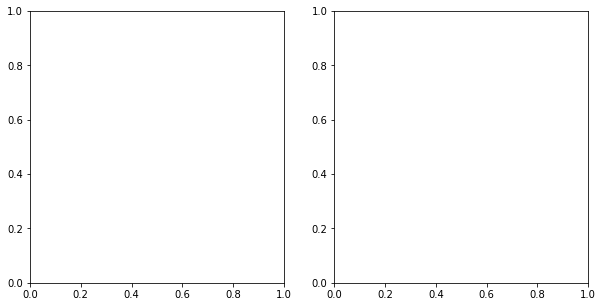

In [44]:
# Plot training & validation loss/accuracy values
import matplotlib.pyplot as plt

fig,ax = plt.subplots(ncols=2, figsize=(10,5))

ax[0].plot(range(1,26),
           historyA.history['loss']+historyB.history['loss'], 
           label='training loss',
           color="yellow", 
           marker="o")
ax[0].plot(range(1,26),
           historyA.history['val_loss']+historyB.history['val_loss'], 
           label='validation loss',
           color="orange", 
           marker="o")

ax[0].set_xlabel("epochs", fontsize = 16)

ax[0].set_ylabel("loss",
              color="green",
              fontsize=16)
ax[0].legend(loc='best')
ax[0].grid(True)
ax[1].plot(range(1,26),
           historyA.history['accuracy']+historyB.history['accuracy'],
         label='training accuracy',
       
         marker="X")
ax[1].plot(range(1,26),
           historyA.history['val_accuracy']+historyB.history['val_accuracy'],
         label='validation accuracy',
        
         marker="X")
ax[1].set_xlabel("epochs", fontsize = 16)
ax[1].set_ylabel("Accuracy",color="black",fontsize=16)

ax[1].legend(loc='most accurate')
ax[1].grid(True)

fig.show()

In [41]:
bmodel.predict(val_generator)

array([[4.2801940e-07, 9.9999952e-01, 2.9066578e-09],
       [9.9999964e-01, 8.6285006e-08, 2.1533913e-07],
       [1.8041270e-06, 4.8131649e-05, 9.9995005e-01],
       ...,
       [9.9999988e-01, 6.3826791e-15, 7.9187139e-08],
       [3.3657070e-09, 7.0910405e-06, 9.9999285e-01],
       [9.9999905e-01, 4.7209241e-08, 9.9077113e-07]], dtype=float32)

In [42]:
print(bmodel.evaluate(val_generator))

85/85 [==============================] - 30s 351ms/step - loss: 0.1328 - accuracy: 0.9662
[0.13279220461845398, 0.9662212133407593]


In [43]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
a=bmodel.predict(val_generator)
print(a)
min=0.0
a=[]
for i in range(0,8):
  min =a[i,0]
  
  for j in range(0,2):
    if(a[i,j]>min):
      min=a[i,j]
  
  for j in range(0,2):
    if(a[i,j]==min):
      a.append(j)
# print classification report

[[9.9999809e-01 1.1876934e-06 6.7410122e-07]
 [9.9992788e-01 7.0069793e-05 1.9919476e-06]
 [6.5716588e-01 3.4283394e-01 1.3785889e-07]
 ...
 [6.6207331e-06 9.9977487e-01 2.1842879e-04]
 [5.7361554e-10 1.4788148e-05 9.9998522e-01]
 [9.9999666e-01 3.3103349e-06 3.7687708e-14]]


TypeError: ignored

In [ ]:
# Use the classification report to print precision, recall, f1-score for the three classes(optional, brownie points)